<a href="https://colab.research.google.com/github/Nick-FF/Python_Lib/blob/lesson5/Learn_wout_teacher.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from sklearn.datasets import load_boston

In [ ]:
boston = load_boston()

In [ ]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
data=boston.data

In [ ]:
feature_names=boston.feature_names
X=pd.DataFrame(boston.data, columns=feature_names)

In [ ]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
y=pd.DataFrame(boston.target, columns=['price'])
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state = 42 )

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [ ]:
X_train_tsne = tsne.fit_transform(X_train_scaled)
X_train_tsne

array([[ 28.13809   ,  18.375324  ],
       [ -9.785578  ,  -4.5355387 ],
       [-15.695753  , -17.543627  ],
       [ 37.924854  ,  13.517046  ],
       [ -8.786393  ,   3.9951665 ],
       [-13.988173  ,  -7.7626657 ],
       [-11.960751  ,  -7.4771976 ],
       [-18.704308  , -23.812914  ],
       [ 38.665813  ,  12.55771   ],
       [ 35.53426   ,  11.327715  ],
       [-12.056245  ,  -8.116859  ],
       [ -5.7400675 ,  -5.8184624 ],
       [ -2.0275154 ,  -8.284211  ],
       [ 35.76188   ,  12.485169  ],
       [ -2.2966845 , -10.11944   ],
       [-10.227566  ,   7.138571  ],
       [ -7.261146  ,   1.1323055 ],
       [-14.401978  , -18.217144  ],
       [-13.338248  , -12.094605  ],
       [-17.165924  , -12.843067  ],
       [ 34.02783   ,  17.060034  ],
       [ -4.4231987 ,   0.22272195],
       [-15.497815  ,  -7.9093003 ],
       [-10.733389  ,  -5.5205164 ],
       [-18.339699  , -23.839216  ],
       [ -3.087924  ,  -8.492775  ],
       [  8.2998    ,   2.3935862 ],
 

In [ ]:
from matplotlib import pyplot as plt

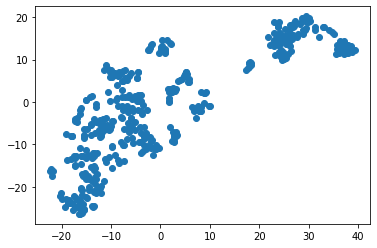

In [ ]:
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1])

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmean = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [ ]:
labels_train = kmean.fit_predict(X_train_scaled)

In [ ]:
pd.value_counts(labels_train)

0    191
1    127
2     86
dtype: int64

In [ ]:
labels_test = kmean.fit_predict(X_test_scaled)

In [ ]:
centers=scaler.inverse_transform(kmean.cluster_centers_)
centers

array([[9.41918184e+00, 0.00000000e+00, 1.90452632e+01, 4.85722573e-17,
        6.63342105e-01, 5.94742105e+00, 9.34421053e+01, 2.06347368e+00,
        2.03421053e+01, 6.37342105e+02, 2.01552632e+01, 3.07214211e+02,
        1.86926316e+01],
       [2.24421200e-01, 3.92000000e+00, 8.52200000e+00, 1.00000000e-01,
        4.91440000e-01, 6.10210000e+00, 6.01980000e+01, 4.26876400e+00,
        4.40000000e+00, 3.07240000e+02, 1.86660000e+01, 3.87730800e+02,
        1.17792000e+01],
       [8.61857143e-02, 6.28571429e+01, 3.38785714e+00, 7.14285714e-02,
        4.34078571e-01, 6.94985714e+00, 3.15285714e+01, 6.42361429e+00,
        4.21428571e+00, 2.68428571e+02, 1.70500000e+01, 3.91423571e+02,
        5.02857143e+00]])

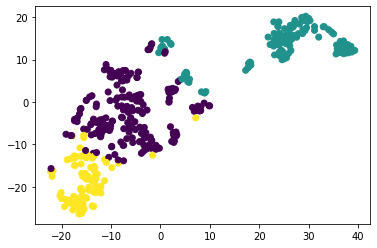

In [ ]:
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1], c=labels_train)
# plt.scatter(centers[:,0], centers[:,1], marker='D', color='red')

In [ ]:
y_train.mean()

price    22.796535
dtype: float64

In [ ]:
y_train[labels_train==0].mean()

price    24.958115
dtype: float64

In [ ]:
y_train[labels_train==1].mean()

price    16.165354
dtype: float64

In [ ]:
y_train[labels_train==2].mean()

price    27.788372
dtype: float64

Text(0.5, 0, 'Цена')

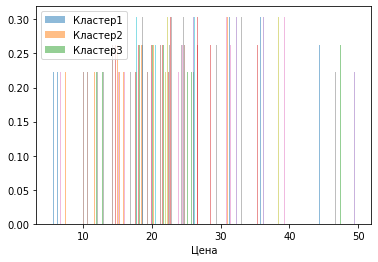

In [ ]:
plt.hist(y_train[labels_train==0], bins=10, density=True, alpha=0.5)
plt.hist(y_train[labels_train==1], bins=10, density=True, alpha=0.5)
plt.hist(y_train[labels_train==2], bins=10, density=True, alpha=0.5)
plt.legend(['Кластер1', 'Кластер2','Кластер3'])
plt.xlabel('Цена')

In [ ]:
X_train.loc[labels_train==0, 'CRIM'].mean()

0.42166020942408367

In [ ]:
X_train.loc[labels_train==1, 'CRIM'].mean()

10.797028425196853

In [ ]:
X_train.loc[labels_train==2, 'CRIM'].mean()

0.07356558139534886

Text(0.5, 0, 'Кримирал')

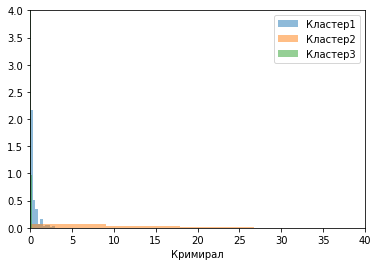

In [ ]:
plt.hist(X_train.loc[labels_train==0, 'CRIM'], bins=10, density=True, alpha=0.5)
plt.hist(X_train.loc[labels_train==1, 'CRIM'], bins=10, density=True, alpha=0.5)
plt.hist(X_train.loc[labels_train==2, 'CRIM'], bins=10, density=True, alpha=0.5)
plt.legend(['Кластер1', 'Кластер2','Кластер3'])
plt.ylim(0,4)
plt.xlim(0,40)
plt.xlabel('Кримирал')

задание 3

In [ ]:
model_train = kmean.fit_predict(X_train)
# model_train

In [ ]:
model_test = kmean.fit_predict(X_test)

In [ ]:
y_test.mean()

price    21.488235
dtype: float64

In [ ]:
y_test[labels_test==0].mean()

price    16.710526
dtype: float64

In [ ]:
y_test[labels_test==1].mean()

price    21.652
dtype: float64

In [ ]:
y_test[labels_test==2].mean()

price    33.871429
dtype: float64